# Searching Algorithms

In [3]:
import matplotlib.pyplot as plt

In [4]:
def count_calls(counter):
    def decorator(func):
        def wrapper(*args):
            params = f"{args}"
            counter[params] = 1 if params not in counter else counter[params]+1
            return func(*args)
        return wrapper
    return decorator

In [5]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

In [6]:
test_num = 20

## Linear Search

Just go through list till we reach the end.

### Algorithm

In [7]:
def linear_search(L,e):
    # pre definition
    counter = {}
    @count_calls(counter)
    def ls(L,e,index):
        # base case
        if index == len(L):
            return False
        if L[index] == e:
            return True
        else:
            return ls(L,e,index+1)
    # main function
    if len(L) == 0:
        return false, counter
    else:
        return ls(L,e,0), counter

### Growth

T(n) = **O(n)**

{1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21}


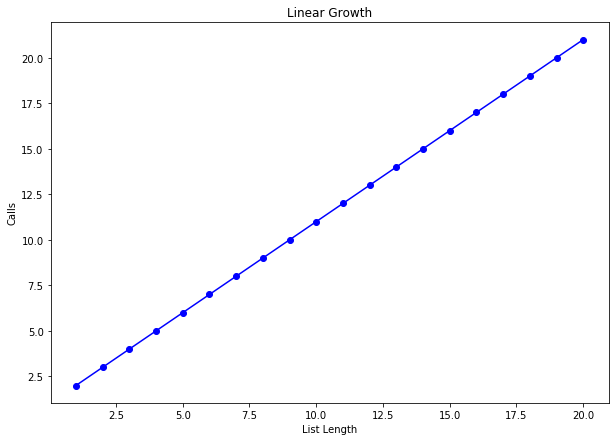

In [15]:
growth_ls = {}
t = []
for i in range(1,test_num+1):
    t.append(i)
    r,ns_c = linear_search(t,i+1)
    growth_ls[i] = get_total(ns_c)
print(growth_ls)
plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_ls.items()))

plt.plot(values, calls,'b-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Linear Growth")

plt.show()

## Bisect Search

Find the middle of list and based on element is bigger or fewer throw out the half.

### Algorithm

In [10]:
def bisect_search(L,e):
    # pre difinition
    counter = {}
    @count_calls(counter)
    def bs(L,e,low,high):
        if low == high:
            return L[low] == e
        else:
            mid = (low+high)//2
            if L[mid] == e:
                return True
            elif L[mid] > e:
                return bs(L,e,low,mid-1)
            elif L[mid] < e:
                return bs(L,e,mid+1,high)
    # main func
    if len(L) == 0:
        return false
    else:
        return bs(L,e,0,len(L)-1), counter

### Growth

T(n) = **O(logn)**

{1: 1, 2: 2, 3: 2, 4: 3, 5: 3, 6: 3, 7: 3, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5}


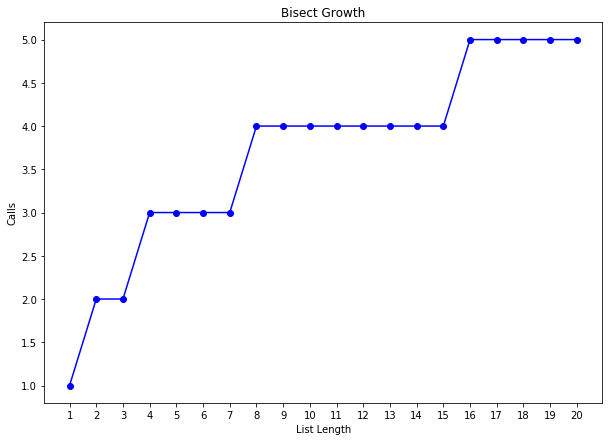

In [16]:
growth_bs = {}
t = []
for i in range(1,test_num+1):
    t.append(i)
    r,bs_c = bisect_search(t,i+1)
    growth_bs[i] = get_total(bs_c)
print(growth_bs)
plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_bs.items()))

plt.plot(values, calls,'b-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.xticks(list(range(1,test_num+1)))
plt.title("Bisect Growth")

plt.show()

## Comparision

**Normal Search** is **Linear**: **O(n)**  
**Bisect Search** is **Logaritmic**: **O(log n)**

Linear: {1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21}
Bisect: {1: 1, 2: 2, 3: 2, 4: 3, 5: 3, 6: 3, 7: 3, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5}


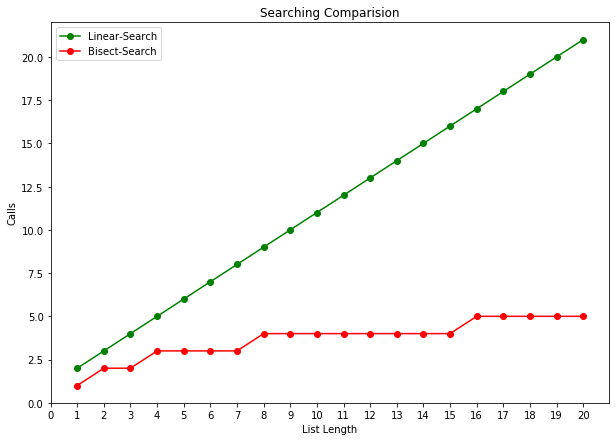

In [18]:
print("Linear:",growth_ls)
print("Bisect:",growth_bs)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_ls.items()))
values2, calls2 = zip(*sorted(growth_bs.items()))

plt.plot(values, calls,'g-o',values2,calls2,'r-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Searching Comparision")
plt.xticks(list(range(0,test_num+1)))
plt.legend(['Linear-Search','Bisect-Search'])

plt.show()